In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import linear_model 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#df=pd.read_csv("/content/drive/My Drive/dse/road_accidents/Road_Accidents.csv")
df=pd.read_csv("Road_Accidents.csv")

In [0]:
df.head()

,Years,Total Number of Road Accidents (in numbers),Total Number of Persons Killed (in numbers),Total Number of Persons Injured (in numbers),Population of India (in thousands),Total Number of Registered Motor Vehicles (in thousands),Road Length (in kms),Number of Accidents per Lakh Population,Number of Accidents per Ten Thousand Vehicles,Number of Accidents per Ten Thousand Kms of Roads,Number of Persons Killed Per Lakh Population,Number of Persons Killed Per Ten Thousand Vehicles,Number of Persons Killed per Ten Thousand Kms of Roads,Number of Persons Injured per Lakh Population,Number of Persons Injured Per Ten Thousand Vehicles,Number of Persons Injured Per Ten Thousand Kms of Roads
0,1970,114100,14500,70100,539000.0,1401.0,1188728.0,21.2,814.4,959.8,2.7,103.5,122.0,13.0,500.4,589.7
1,1980,153200,24000,109100,673000.0,4521.0,1491873.0,22.8,338.9,1026.9,3.6,53.1,160.9,16.2,241.3,731.3
2,1990,282600,54100,244100,835000.0,19152.0,1983867.0,33.8,147.6,1424.5,6.5,28.2,272.7,29.2,127.5,1230.4
3,1994,325864,64463,311500,904000.0,27660.0,2890950.0,36.0,117.8,1127.2,7.1,23.3,223.0,34.5,112.6,1077.5
4,1995,351999,70781,323200,924359.0,30295.0,2975035.0,38.1,116.2,1183.2,7.7,23.4,237.9,35.0,106.7,1086.4


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 16 columns):
Years                                                       27 non-null int64
Total Number of Road Accidents (in numbers)                 27 non-null int64
Total Number of Persons Killed (in numbers)                 27 non-null int64
Total Number of Persons Injured (in numbers)                27 non-null int64
Population of India (in thousands)                          27 non-null float64
Total Number of Registered Motor Vehicles (in thousands)    26 non-null float64
Road Length (in kms)                                        26 non-null float64
Number of Accidents per Lakh Population                     27 non-null float64
Number of Accidents per Ten Thousand Vehicles               26 non-null float64
Number of Accidents per Ten Thousand Kms of Roads           26 non-null float64
Number of Persons Killed Per Lakh Population                27 non-null float64
Number of Persons Killed 

In [0]:
# To find the missing values
df.isnull().sum()

Years                                                       0
Total Number of Road Accidents (in numbers)                 0
Total Number of Persons Killed (in numbers)                 0
Total Number of Persons Injured (in numbers)                0
Population of India (in thousands)                          0
Total Number of Registered Motor Vehicles (in thousands)    1
Road Length (in kms)                                        1
Number of Accidents per Lakh Population                     0
Number of Accidents per Ten Thousand Vehicles               1
Number of Accidents per Ten Thousand Kms of Roads           1
Number of Persons Killed Per Lakh Population                0
Number of Persons Killed Per Ten Thousand Vehicles          1
Number of Persons Killed per Ten Thousand Kms of Roads      1
Number of Persons Injured per Lakh Population               0
Number of Persons Injured Per Ten Thousand Vehicles         1
Number of Persons Injured Per Ten Thousand Kms of Roads     1
dtype: i

In [0]:
# To find the %age inc in No. of vehicles every year

new=df["Total Number of Registered Motor Vehicles (in thousands)"]
l1=[]
for i in range(len(new)+1):
    if(i<26):
        res=((new[i+1]-new[i])/new[i+1])*100
        l1.append(res)
l1  

[69.01128069011281,
 76.39411027568921,
 30.759219088937094,
 8.697804918303351,
 10.332682176049252,
 9.498553519768564,
 9.756333397795396,
 7.815041782729805,
 8.150316228994821,
 11.154552563146696,
 6.674699613060891,
 12.062918799528408,
 7.853626337358014,
 10.777649628229982,
 9.056216385101207,
 7.330389733938598,
 8.20669558531793,
 8.349644631190682,
 10.015969188859142,
 9.952800396995471,
 11.050808010001843,
 12.130264230777705,
 4.822132729255809,
 9.198516352970865,
 8.69795810129939,
 nan]

In [0]:
new=df["Road Length (in kms)"]
l1=[]
for i in range(len(new)+1):
    if(i<26):
        res=((new[i+1]-new[i])/new[i+1])*100
        l1.append(res)
l1  

[20.319759121587428,
 24.79974716046993,
 31.376640896591084,
 2.8263533034065147,
 7.103167354407396,
 2.9184354981284035,
 -2.181667697118905,
 2.071618157826885,
 0.5858728292880927,
 1.7027318646399014,
 1.5491435687180568,
 2.8920659265544315,
 2.5639326390919583,
 4.926261880584571,
 1.8423455239855373,
 3.3798915994692766,
 2.2676460339615225,
 8.093865383282157,
 2.4207414435849555,
 2.018436388004032,
 3.8754518133577673,
 7.005609028574968,
 3.1571391392777324,
 1.2729562672327337,
 2.3405700897668567,
 nan]

In [0]:
new=df["Number of Accidents per Ten Thousand Vehicles"]
l1=[]
for i in range(len(new)+1):
    if(i<26):
        res=((new[i+1]-new[i])/new[i+1])*100
        l1.append(res)
l1  

[-140.3068751844202,
 -129.60704607046068,
 -25.29711375212224,
 -1.3769363166953479,
 -5.732484076433118,
 -9.7902097902098,
 -7.518796992481204,
 -8.130081300813009,
 -7.490636704119851,
 -8.536585365853655,
 -6.647398843930627,
 -14.00329489291598,
 -2.7072758037225064,
 -9.647495361781083,
 -4.863813229571985,
 -3.6290322580645102,
 -7.826086956521743,
 -8.747044917257691,
 -8.184143222506382,
 -11.396011396011396,
 -14.332247557003264,
 -14.552238805970145,
 -4.2801556420233515,
 -7.5313807531380785,
 -14.354066985645932,
 nan]

In [0]:

new=df["Number of Accidents per Ten Thousand Kms of Roads"]
l1=[]
for i in range(len(new)+1):
    if(i<26):
        res=((new[i+1]-new[i])/new[i+1])*100
        l1.append(res)
l1  

[6.534229233615749,
 27.911547911547906,
 -26.37508871540099,
 4.732927653820148,
 -2.0791993788284135,
 -2.321680790960448,
 5.014254569847389,
 -1.7316386590463153,
 0.6946209233375726,
 1.8213572854291493,
 -1.1099899091826475,
 -3.1754294638209384,
 2.9062421026029823,
 -2.939646201873037,
 2.904773932811316,
 0.45260246416896016,
 -1.1616075970832471,
 -8.430633446722444,
 0.23846647711638166,
 -2.4525465138131843,
 -5.585871614247452,
 -8.399655839965586,
 -2.6382602936306414,
 1.134999454327183,
 -6.819771508510144,
 nan]

## Inference:

There is no dependency of the values on prev year's value

In [0]:
#Data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Years,27.0,2.002667e+03,1.089107e+01,1970.0,1997.500,2004.00,2010.500,2017.0
Total Number of Road Accidents (in numbers),27.0,4.091247e+05,9.909051e+04,114100.0,379344.500,429910.00,485544.000,501423.0
Total Number of Persons Killed (in numbers),27.0,9.861004e+04,3.732471e+04,14500.0,77944.000,92618.00,136042.500,150785.0
Total Number of Persons Injured (in numbers),27.0,4.148517e+05,1.193817e+05,70100.0,376706.000,464521.00,498380.000,527512.0
Population of India (in thousands),27.0,1.055093e+06,1.783049e+05,539000.0,968936.500,1079117.00,1192429.000,1283601.0
Total Number of Registered Motor Vehicles (in thousands),26.0,8.739947e+04,6.479083e+04,1401.0,38341.000,69862.50,124547.250,230031.0
Road Length (in kms),26.0,3.728652e+06,1.139316e+06,1188728.0,3245429.500,3575080.50,4554706.750,5603293.0
Number of Accidents per Lakh Population,27.0,3.812222e+01,5.060506e+00,21.2,38.200,39.40,40.350,42.5
Number of Accidents per Ten Thousand Vehicles,26.0,1.043231e+02,1.580265e+02,20.9,39.900,59.90,98.350,814.4
Number of Accidents per Ten Thousand Kms of Roads,26.0,1.110135e+03,1.238532e+02,857.8,1036.225,1152.90,1186.125,1424.5


### Univariate Analysis

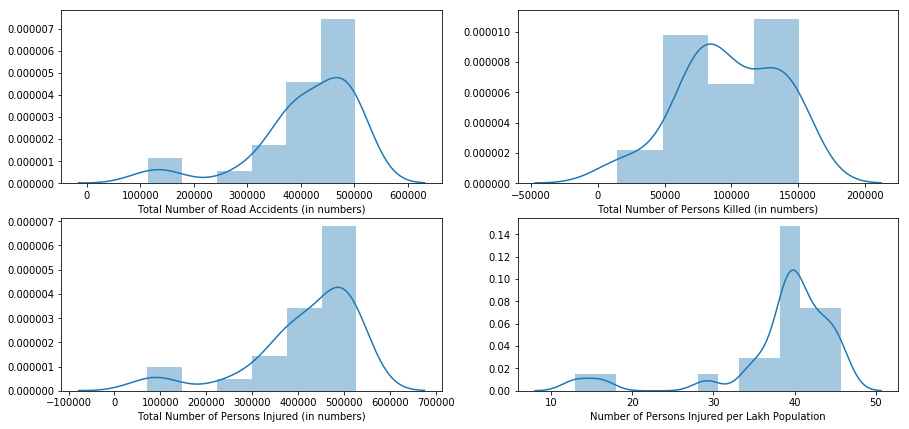

In [0]:
plt.figure(figsize=[15,7])

plt.subplot(221)
sns.distplot(df['Total Number of Road Accidents (in numbers)'])

plt.subplot(222)
sns.distplot(df['Total Number of Persons Killed (in numbers)'])

plt.subplot(223)
sns.distplot(df["Total Number of Persons Injured (in numbers)"])

plt.subplot(224)
sns.distplot(df["Number of Persons Injured per Lakh Population"])
plt.show()

## Inference

No significant relationship between the values

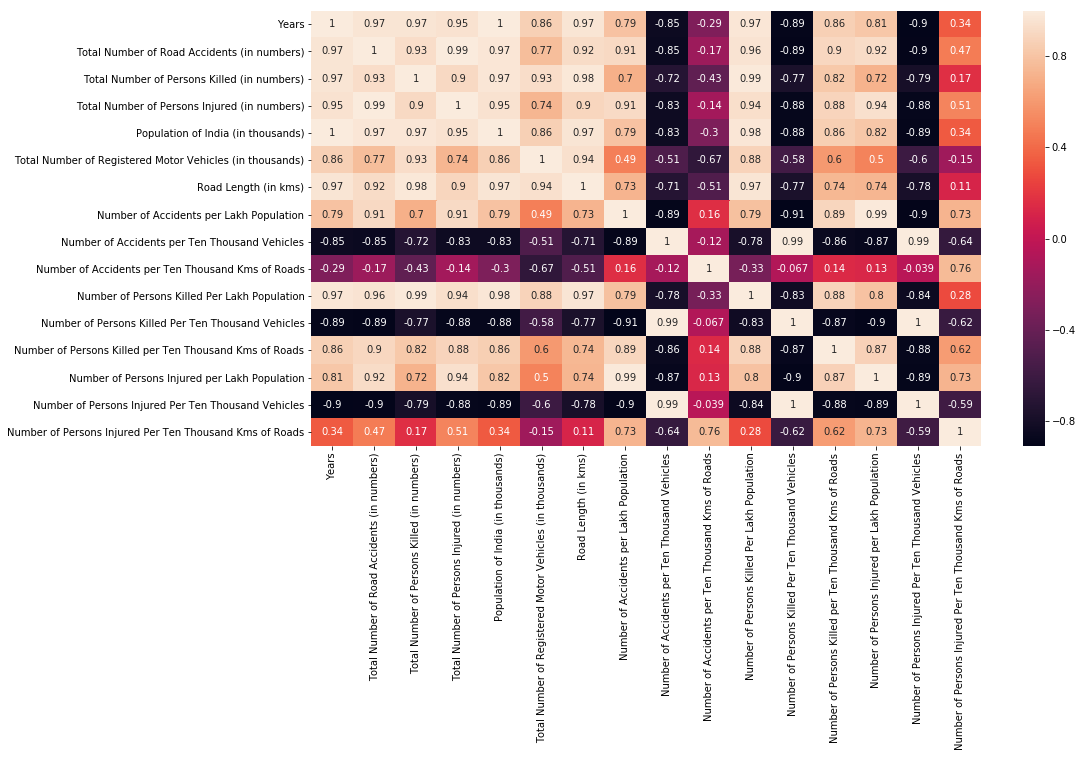

In [0]:
#Correlation

plt.figure(figsize=[15,8])
sns.heatmap(df.corr(),annot=True)

### Inference:

Features are correlated. 

### Imputing the missing values with median

In [0]:
df["Total Number of Registered Motor Vehicles (in thousands)"].fillna(value=69862.50, inplace=True)
df["Road Length (in kms)"].fillna(value=3575080.50, inplace=True)
df["Number of Accidents per Ten Thousand Vehicles"].fillna(value=59.90, inplace=True)
df["Number of Accidents per Ten Thousand Kms of Roads"].fillna(value=1152.90, inplace=True)
df["Number of Persons Killed Per Ten Thousand Vehicles"].fillna(value=12.75, inplace=True)
df["Number of Persons Killed per Ten Thousand Kms of Roads"].fillna(value=252.50, inplace=True)
df["Number of Persons Injured Per Ten Thousand Vehicles"].fillna(value=64.40, inplace=True)
df["Number of Persons Injured Per Ten Thousand Kms of Roads"].fillna(value=1152.00, inplace=True)

In [0]:
## Defining the target variable
X=df.drop(["Years","Total Number of Road Accidents (in numbers)"], axis=1)
y=df["Total Number of Road Accidents (in numbers)"]

In [0]:
## Standardizing the data and performing train test split

X_std = StandardScaler().fit_transform(X)
train_set, test_set, train_labels, test_labels = train_test_split(X_std, y, test_size=0.30, random_state=1)

In [0]:
# Building Linear Regression Model

lr1=LinearRegression()

In [0]:
lr_pred2=lr1.fit(train_set, train_labels).predict(test_set)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
rf_pred=rf.fit(train_set, train_labels).predict(test_set)
gb_pred=gb.fit(train_set, train_labels).predict(test_set)

In [0]:
print("Mean Squared error with Simple Linear Regresssion is: ", mean_squared_error(test_labels, lr_pred2))
print("R2 score with Simple Linear Regresssion is: ", r2_score(test_labels, lr_pred2))
print("Root Mean Squared error(RMSE) with Simple Linear Regresssion is: ", np.sqrt(mean_squared_error(test_labels, lr_pred2)))

Mean Squared error with Simple Linear Regresssion is:  5451944.975920745
R2 score with Simple Linear Regresssion is:  0.9985734017280113
Root Mean Squared error(RMSE) with Simple Linear Regresssion is:  2334.940036900465


In [0]:
print("Mean Squared error with Random Forest Regresssion is: ", mean_squared_error(test_labels, rf_pred))
print("R2 score with Random Forest Regresssion is: ", r2_score(test_labels, rf_pred))
print("Root Mean Squared error(RMSE) with Random Forest Regresssion is: ", np.sqrt(mean_squared_error(test_labels, rf_pred)))

Mean Squared error with Random Forest Regresssion is:  240076644.17999983
R2 score with Random Forest Regresssion is:  0.9371796804177773
Root Mean Squared error(RMSE) with Random Forest Regresssion is:  15494.406867640975


In [0]:
print("Mean Squared error with Gradient Boost Regresssion is: ", mean_squared_error(test_labels, gb_pred))
print("R2 score with Gradient Boost Regresssion is: ", r2_score(test_labels, gb_pred))
print("Root Mean Squared error(RMSE) with Gradient Boost Regresssion is: ", np.sqrt(mean_squared_error(test_labels, gb_pred)))

Mean Squared error with Gradient Boost Regresssion is:  220367678.35438618
R2 score with Gradient Boost Regresssion is:  0.9423368815109077
Root Mean Squared error(RMSE) with Gradient Boost Regresssion is:  14844.786234715075


In [0]:
## Using Decision tree Regresssor

dt_model = DecisionTreeRegressor()
dt_model.fit(train_set, train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
y_predict=dt_model.predict(test_set)

In [0]:
print("Mean Squared error with Decision tree Regresssion is: ", mean_squared_error(test_labels, y_predict))
print("R2 score with Simple Decision tree Regresssion is: ", r2_score(test_labels, y_predict))
print("Root Mean Squared error(RMSE) with Decision tree Regresssion is: ", np.sqrt(mean_squared_error(test_labels, y_predict)))

Mean Squared error with Decision tree Regresssion is:  361009256.7777778
R2 score with Simple Decision tree Regresssion is:  0.9055355136257358
Root Mean Squared error(RMSE) with Decision tree Regresssion is:  19000.243597853627


Text(0, 0.5, 'Total Accidents')

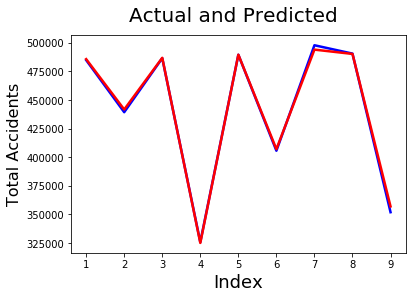

In [0]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,10,1)]         # generating index 
fig = plt.figure()
plt.plot(c,test_labels, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,lr_pred2, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Total Accidents', fontsize=16)                       # Y-label

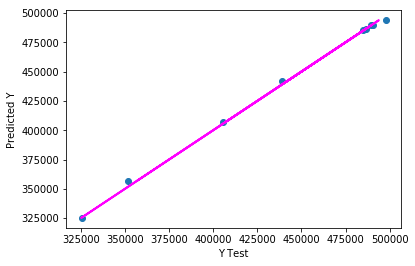

In [0]:
#Scatter plot of actual VS Predicted values
plt.scatter(test_labels, lr_pred2)
plt.plot(lr_pred2,lr_pred2, color='magenta', linewidth=2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Inference:

With simple linear regression, RMSE is lower but in decision tree regressor, RMSE is higher whereas, R2 is lower. Since RMSE is a better metrics in predicting than R2 value. We'll go with Simple linear regression.

### Stats Summary

In [0]:
X=StandardScaler().fit_transform(X)

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=1)

In [0]:
logm2 = sm.GLM(ytrain,(sm.add_constant(xtrain)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Generalized Linear Model Regression Results                              
=======================================================================================================
Dep. Variable:     Total Number of Road Accidents (in numbers)   No. Observations:                   18
Model:                                                     GLM   Df Residuals:                        3
Model Family:                                         Binomial   Df Model:                           14
Link Function:                                           logit   Scale:                          1.0000
Method:                                                   IRLS   Log-Likelihood:                    nan
Date:                                         Mon, 29 Jul 2019   Deviance:                   6.9294e+08
Time:                                                 14:22:31   Pearson chi2:                 1.35e+28
No. Iterations:                                              2   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.765e+21    3.3e+07   8.37e+13      0.000    2.77e+21    2.77e+21
x1         -5.223e+20   8.33e+09  -6.27e+10      0.000   -5.22e+20   -5.22e+20
x2          7.849e+20   3.89e+09   2.02e+11      0.000    7.85e+20    7.85e+20
x3          2.333e+20   3.68e+09   6.33e+10      0.000    2.33e+20    2.33e+20
x4          5.955e+19   8.36e+08   7.12e+10      0.000    5.96e+19    5.96e+19
x5         -1.493e+20   2.39e+09  -6.26e+10      0.000   -1.49e+20   -1.49e+20
x6          2.875e+20   2.29e+09   1.26e+11      0.000    2.88e+20    2.88e+20
x7            1.8e+19   6.73e+09   2.67e+09      0.000     1.8e+19     1.8e+19
x8          7.633e+19   1.97e+09   3.87e+10      0.000    7.63e+19    7.63e+19
x9          4.039e+20   4.98e+09   8.11e+10      0.000    4.04e+20    4.04e+20
x10        -1.924e+20   5.67e+09  -3.39e+10      0.000   -1.92e+20   -1.92e+20
x11        -2.269e+19   1.52e+09  -1.49e+10      0.000   -2.27e+19   -2.27e+19
x12        -3.542e+20   3.74e+09  -9.47e+10      0.000   -3.54e+20   -3.54e+20
x13         1.517e+20   9.87e+09   1.54e+10      0.000    1.52e+20    1.52e+20
x14        -1.788e+20    4.2e+09  -4.25e+10      0.000   -1.79e+20   -1.79e+20
==============================================================================
"""

In [0]:
from sklearn.linear_model import LinearRegression
logreg1 = LinearRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg1, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [0]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [0]:
vif_cal(input_data=df,dependent_col="Total Number of Road Accidents (in numbers)")

,Var,Vif
12,Number of Persons Injured per Lakh Population,587618.51
14,Number of Persons Injured Per Ten Thousand Kms...,518789.85
9,Number of Persons Killed Per Lakh Population,296465.14
1,Total Number of Persons Killed (in numbers),293899.20
3,Population of India (in thousands),276806.93
8,Number of Accidents per Ten Thousand Kms of Roads,248045.36
6,Number of Accidents per Lakh Population,234636.48
0,Years,204937.57
2,Total Number of Persons Injured (in numbers),192745.42
13,Number of Persons Injured Per Ten Thousand Veh...,103623.97


In [0]:
df.columns

Index(['Years', 'Total Number of Road Accidents (in numbers)',
       'Total Number of Persons Killed (in numbers)',
       'Total Number of Persons Injured (in numbers)',
       'Population of India (in thousands)',
       'Total Number of Registered Motor Vehicles (in thousands)',
       'Road Length (in kms)', 'Number of Accidents per Lakh Population',
       'Number of Accidents per Ten Thousand Vehicles',
       'Number of Accidents per Ten Thousand Kms of Roads',
       'Number of Persons Killed Per Lakh Population',
       'Number of Persons Killed Per Ten Thousand Vehicles',
       'Number of Persons Killed per Ten Thousand Kms of Roads',
       'Number of Persons Injured per Lakh Population',
       'Number of Persons Injured Per Ten Thousand Vehicles',
       'Number of Persons Injured Per Ten Thousand Kms of Roads'],
      dtype='object')

In [0]:
#Removing features with VIF>5
col=["Number of Persons Injured per Lakh Population",
     "Number of Persons Killed per Ten Thousand Kms of Roads","Number of Persons Killed Per Lakh Population",
     "Number of Accidents per Ten Thousand Kms of Roads","Number of Accidents per Lakh Population",
     "Number of Persons Injured Per Ten Thousand Vehicles","Number of Persons Killed per Ten Thousand Kms of Roads",
     "Number of Accidents per Ten Thousand Vehicles"]

col1=["Total Number of Persons Killed (in numbers)","Years",
      "Population of India (in thousands)","Total Number of Persons Injured (in numbers)","Road Length (in kms)"]

In [0]:
logm5 = sm.GLM(y,(sm.add_constant(df[col1])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Generalized Linear Model Regression Results                              
=======================================================================================================
Dep. Variable:     Total Number of Road Accidents (in numbers)   No. Observations:                   27
Model:                                                     GLM   Df Residuals:                       21
Model Family:                                         Binomial   Df Model:                            5
Link Function:                                           logit   Scale:                          1.0000
Method:                                                   IRLS   Log-Likelihood:                    nan
Date:                                         Mon, 29 Jul 2019   Deviance:                   1.0825e+09
Time:                                                 14:22:37   Pearson chi2:                 2.15e+28
No. Iterations:                                              2   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                        -6.481e+22   7.16e+10  -9.05e+11      0.000   -6.48e+22   -6.48e+22
Total Number of Persons Killed (in numbers)   6.496e+14   1955.996   3.32e+11      0.000     6.5e+14     6.5e+14
Years                                         3.355e+19    3.7e+07   9.06e+11      0.000    3.35e+19    3.35e+19
Population of India (in thousands)            -1.53e+15   2592.483   -5.9e+11      0.000   -1.53e+15   -1.53e+15
Total Number of Persons Injured (in numbers)  4.351e+15    443.411   9.81e+12      0.000    4.35e+15    4.35e+15
Road Length (in kms)                          3.734e+13     35.717   1.05e+12      0.000    3.73e+13    3.73e+13
================================================================================================================
"""

## Ridge and Lasso

In [0]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, # GridSearchCV func which will take all the options of combination
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, #cross validation
                        return_train_score=True,
                        verbose = 1)   # for 1,only display last           
model_cv.fit(xtrain, ytrain) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [0]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.105751,1.964696e-01,0.000397,0.000486,0.0001,{'alpha': 0.0001},-1233.269589,-5143.920065,-20304.380947,-2016.819993,...,-6433.716320,7568.904238,2,-178.189124,-30.017735,-215.822514,-223.130664,-222.395457,-173.911099,73.828811
1,0.001995,8.921772e-04,0.000199,0.000399,0.001,{'alpha': 0.001},-2987.413441,-5057.094443,-11783.557030,-1971.109467,...,-4918.334726,3896.433749,1,-382.290927,-83.813038,-424.430789,-318.252955,-331.813347,-308.120211,118.327673
2,0.000798,3.988507e-04,0.000200,0.000399,0.01,{'alpha': 0.01},-9964.140340,-5460.170037,-12629.378108,-3802.021657,...,-7052.665895,4123.976988,3,-701.709328,-465.069800,-632.607934,-735.489830,-662.494070,-639.474192,93.900125
3,0.000997,3.162980e-07,0.000200,0.000400,0.05,{'alpha': 0.05},-12761.635509,-5788.895823,-7281.472821,-7214.245999,...,-7418.035309,3228.322662,4,-1290.739343,-1525.974272,-1883.272836,-1436.787318,-1764.598038,-1580.274361,215.940201
4,0.000798,3.990179e-04,0.000200,0.000399,0.1,{'alpha': 0.1},-12179.323756,-5704.548116,-9178.448851,-8556.486786,...,-8067.547171,2897.634073,5,-1778.911832,-2205.505286,-2741.227377,-1699.470076,-2352.164532,-2155.455820,383.154266


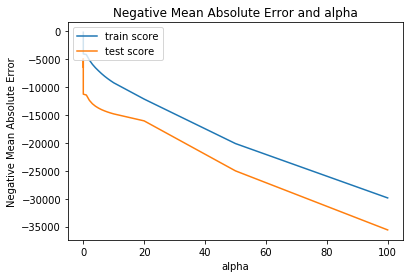

In [0]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [0]:
alpha = 0
ridge = Ridge(alpha=alpha)

ridge.fit(xtrain, ytrain)
ridge.coef_

array([ 29798.84839411,  -3328.4583745 ,  19118.93282   ,   8080.14037755,
        14203.29734787,    952.66988091,  16294.24329656, -70389.93750977])

In [0]:
ridge_pred=ridge.predict(xtest)

In [0]:
print("RMSE using Ridge: ", np.sqrt(mean_squared_error(ytest,ridge_pred)))
print("R2 value using Ridge: ", r2_score(ytest,ridge_pred))

RMSE using Ridge:  1226.207295505676
R2 value using Ridge:  0.9996065604442719


Text(0, 0.5, 'Total Accidents')

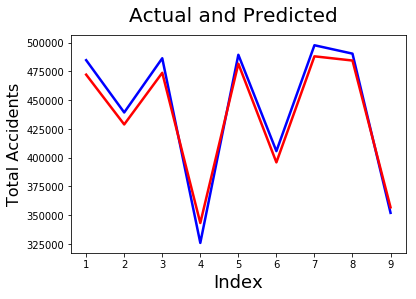

In [0]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,10,1)]         # generating index 
fig = plt.figure()
plt.plot(c,ytest, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,ridge_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Total Accidents', fontsize=16)                       # Y-label

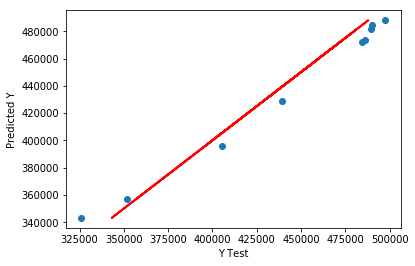

In [0]:
#Scatter plot of actual VS Predicted values
plt.scatter(ytest,ridge_pred)
plt.plot(ridge_pred,ridge_pred, color='red', linewidth=2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
        
plt.show()

## LASSO

In [0]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(xtrain, ytrain) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [0]:
lasso_pred=model_cv.predict(xtest)

In [0]:
print("RMSE using Ridge: ",np.sqrt(mean_squared_error(ytest,lasso_pred)))
print("R2 score using Ridge: ",r2_score(ytest,lasso_pred))

RMSE using Ridge:  3695.5003952185357
R2 score using Ridge:  0.9964264757324385


Text(0, 0.5, 'Total Accidents')

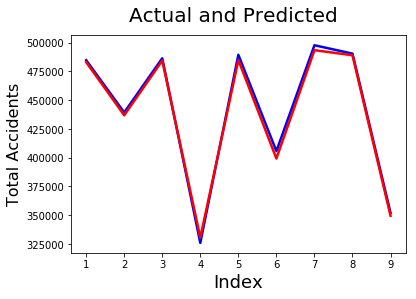

In [0]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,10,1)]         # generating index 
fig = plt.figure()
plt.plot(c,ytest, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,lasso_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Total Accidents', fontsize=16)                       # Y-label

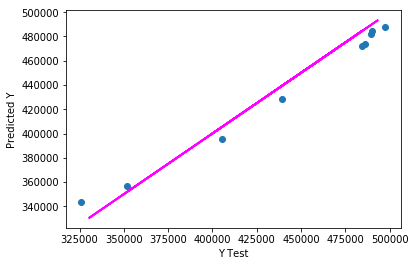

In [0]:
#Scatter plot of actual VS Predicted values
plt.scatter(ytest,ridge_pred)
plt.plot(lasso_pred,lasso_pred, color='magenta', linewidth=2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')  
plt.show()

## USING PCA:

In [0]:
# Calculating covariance matrix:

cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.03846154  0.93980482  1.00996769  0.91523641  0.97593325  0.73168633
  -0.73111852 -0.41316224  1.02715207 -0.78638548  0.82709986  0.7502859
  -0.80205618  0.18518577]
 [ 0.93980482  1.03846154  0.98947455  0.75586622  0.92275935  0.9467309
  -0.86655445 -0.13573488  0.97227153 -0.91394829  0.91453613  0.97667511
  -0.91261606  0.5345455 ]
 [ 1.00996769  0.98947455  1.03846154  0.85157014  0.9637696   0.82529736
  -0.85029597 -0.2820791   1.01426054 -0.89984619  0.86189409  0.84937791
  -0.90597672  0.35304739]
 [ 0.91523641  0.75586622  0.85157014  1.03846154  0.98011002  0.50929738
  -0.5278361  -0.69559901  0.87624126 -0.59297563  0.62483355  0.52394966
  -0.62242981 -0.16076857]
 [ 0.97593325  0.92275935  0.9637696   0.98011002  1.03846154  0.75702464
  -0.73827699 -0.53258243  0.97424713 -0.79561933  0.77019005  0.7665197
  -0.81253253  0.11150289]
 [ 0.73168633  0.9467309   0.82529736  0.50929738  0.75702464  1.03846154
  -0.91361447  0.15978253  0.820

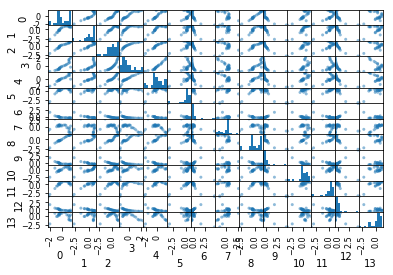

In [0]:
# Plotting the matrix

X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

In [0]:
#Calculating eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [0]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.28114508 -0.2108527   0.2047129  -0.29752399  0.33587623  0.15792567
   0.01104944  0.09925441 -0.21658249 -0.04379281  0.54677219 -0.15268968
   0.46794425 -0.09095179]
 [ 0.30278253 -0.01109513  0.27468796  0.18301824  0.19221937 -0.21752641
  -0.27924436 -0.50055496 -0.42945785 -0.1658537  -0.05607032 -0.09137762
  -0.26127115  0.30782124]
 [ 0.29765908 -0.11642678  0.0440693  -0.14000077  0.47283061 -0.19702457
   0.23173921 -0.28841763  0.4755664   0.27995447 -0.24610186 -0.09512087
  -0.11233752 -0.30042398]
 [ 0.23017425 -0.38139537  0.01427205 -0.1074789  -0.40837545 -0.58857516
   0.20453366  0.23354263 -0.27944314  0.31693523 -0.01921504  0.0159852
  -0.02373263 -0.02258724]
 [ 0.27892588 -0.25148321  0.00258537  0.17061067 -0.20119651 -0.08570249
   0.27435479  0.03137897  0.33724189 -0.75353283 -0.02468089 -0.10966572
   0.07939446  0.07265472]
 [ 0.28460433  0.17531779  0.17165431  0.38626791 -0.26263166  0.41041522
   0.47502961 -0.14624005 -0.01497

In [0]:
# Creating Eigen Pairs

eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [0]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 74.32394608  94.09038903  96.60171182  98.43198778  99.41891641
  99.80765012  99.95567227  99.9841787   99.99589559  99.99901129
  99.99948369  99.99978888  99.9999485  100.        ]


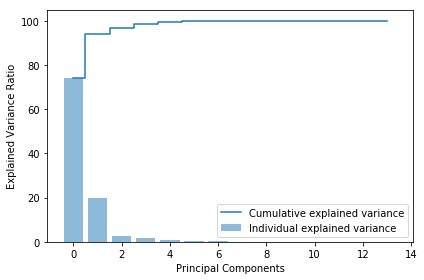

In [0]:
plt.figure(figsize=(6 , 4))
plt.bar(range(14), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(14), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

([], <a list of 0 Text yticklabel objects>)

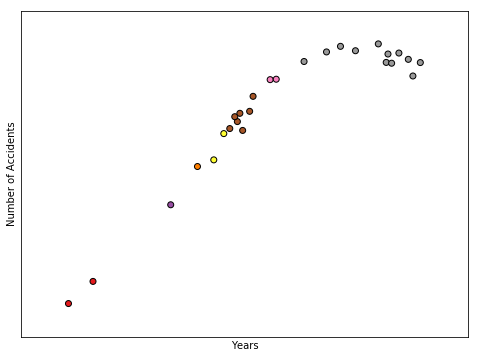

In [0]:
X=pd.DataFrame(X)
## Get the min and max of the two dimensions and extend the margins by .5 on both sides to get the data points away
## from the origin in the plot
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5

## plot frame size
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points (scatter plot, all rows first and second column only)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Years')
plt.ylabel('Number of Accidents')


## plotting the axes with ticks
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

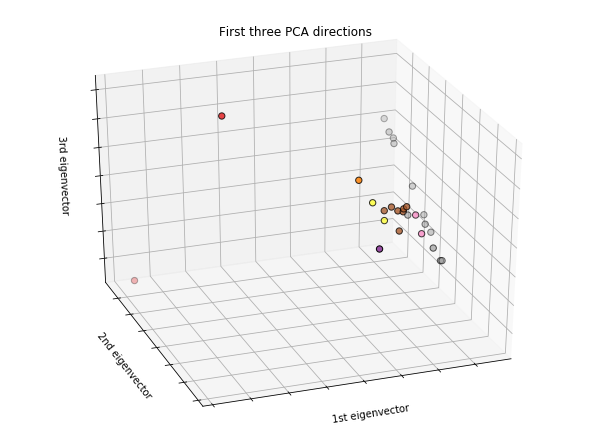

In [0]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_std)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs[index][1] for index in range(len(eig_vals))]
#Project data onto 2d 

# Keep the first two principal components 
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:8]).transpose()

# Let's project data onto 2D space
Proj_data_2D = np.dot(X_std,P_reduce)
Proj_data_2D.shape

(27, 8)

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(Proj_data_2D, y, test_size=0.30, random_state=1)

In [0]:
dt_model2 = DecisionTreeRegressor()
dt_model2.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
y_predict2=dt_model2.predict(xtest)

In [0]:
print("Mean Squared error with Decision tree Regresssion after PCA: ", mean_squared_error(ytest, y_predict2))
print("R2 score with Simple Decision tree Regresssion after PCA: ", r2_score(ytest, y_predict2))
print("Root Mean Squared error(RMSE) with Decision tree Regresssion after PCA: ", np.sqrt(mean_squared_error(ytest, y_predict2)))

Mean Squared error with Decision tree Regresssion after PCA:  3576612816.7777777
R2 score with Simple Decision tree Regresssion after PCA:  0.06411570796785016
Root Mean Squared error(RMSE) with Decision tree Regresssion after PCA:  59804.78924616136


In [0]:
lr=LinearRegression()

In [0]:
lr_pred=lr.fit(xtrain,ytrain).predict(xtest)

In [0]:
print("Mean Squared error with Simple Linear Regresssion after PCA: ", mean_squared_error(ytest, lr_pred))
print("R2 score with Simple Linear Regresssion after PCA: ", r2_score(ytest, lr_pred))
print("Root Mean Squared error(RMSE) with Simple Linear Regresssion after PCA: ", np.sqrt(mean_squared_error(ytest,lr_pred)))

Mean Squared error with Simple Linear Regresssion after PCA:  1503584.3315513465
R2 score with Simple Linear Regresssion after PCA:  0.9996065604442719
Root Mean Squared error(RMSE) with Simple Linear Regresssion after PCA:  1226.207295505677


Text(0, 0.5, 'Total Accidents')

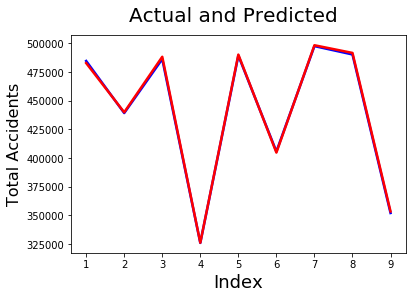

In [0]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,10,1)]         # generating index 
fig = plt.figure()
plt.plot(c,ytest, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,lr_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Total Accidents', fontsize=16)                       # Y-label

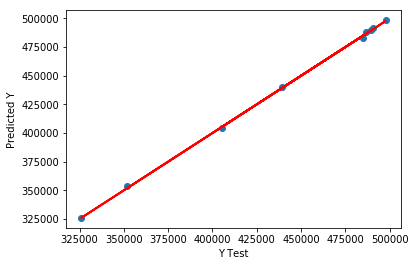

In [0]:
#Scatter plot of actual VS Predicted values
plt.scatter(ytest,lr_pred)
plt.plot(ytest,ytest, color='red', linewidth=2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
        
plt.show()

In [0]:
cluster_range = range( 1, 14 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 10 )
    clusters.fit(Proj_data_2D)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:14]

,num_clusters,cluster_errors
0,1,377.940196
1,2,167.844904
2,3,78.552225
3,4,51.288534
4,5,37.258675
5,6,24.702434
6,7,17.350759
7,8,12.249580
8,9,8.282363
9,10,5.628749


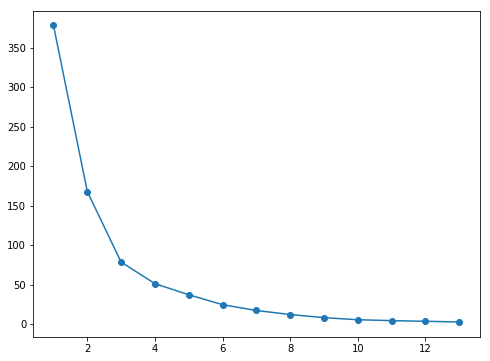

In [0]:
# Elbow plot

plt.figure(figsize=(8,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [0]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(X_std)
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns=list(X) )
centroid_df

,-2.296395,-2.942820,-2.949577,-1.367051,-2.310802,-3.407679,4.673394,-1.271805,-2.689349,4.461097,-3.438248,-3.325768,4.476128,-3.033983
,-2.037023,-2.609914,-2.183739,-1.317077,-2.034384,-3.085482,1.551110,-0.710069,-2.303341,1.803015,-2.400907,-2.904871,1.667124,-2.197143
,-1.215225,-1.457546,-1.257876,-1.082729,-1.585767,-0.870379,0.294974,2.618489,-1.059537,0.489796,0.580449,-1.194977,0.433374,0.752482
,-0.932292,-0.882216,-0.863526,-0.946455,-0.758659,-0.427358,0.099297,0.129605,-0.802198,0.231371,-0.744894,-0.497867,0.271838,-0.151140
,-0.759796,-0.782344,-0.747171,-0.904250,-0.681987,-0.004475,0.088791,0.598416,-0.544859,0.236645,-0.347558,-0.432101,0.207874,-0.098542
,-0.653754,-0.387107,-0.648755,-0.848334,-0.474563,0.257310,0.047423,0.396660,-0.459080,0.168083,-0.475559,0.120326,0.237145,0.299785
,-0.590631,-0.311486,-0.544664,-0.791537,-0.386778,0.156623,-0.016927,0.176486,-0.416190,0.088974,-0.470226,0.146632,0.150414,0.259597
,-0.510308,-0.206382,-0.440138,-0.726891,-0.451000,0.257310,-0.062891,0.677109,-0.330410,0.020412,-0.088890,0.212397,0.074525,0.632511
,-0.454420,-0.339741,-0.336984,-0.670719,-0.388728,0.136486,-0.108855,0.507165,-0.330410,-0.032327,-0.062223,-0.076970,-0.042562,0.204635
,-0.537828,-0.133049,-0.230139,-0.606939,-0.371012,0.096212,-0.148253,0.575813,-0.501969,-0.143081,-0.344891,0.133479,-0.063161,0.596461
,-0.483852,-0.082251,-0.151354,-0.508689,-0.318635,0.257310,-0.189621,0.759151,-0.459080,-0.222191,-0.296891,0.146632,-0.149892,0.579913


Text(0.5, 0.92, '3D plot of KMeans Clustering')

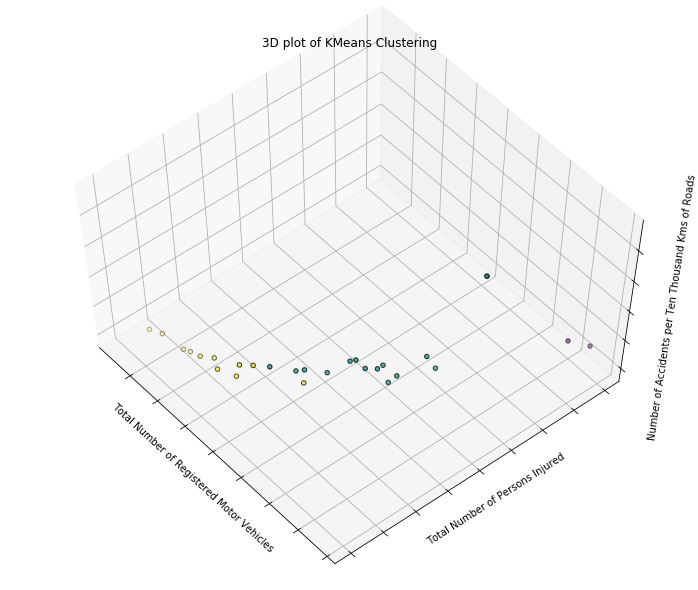

In [0]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=60, azim=140)
kmeans.fit(X_std)
labels = kmeans.labels_
ax.scatter(X_std[:, 3], X_std[:, 1], X_std[:, 7],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Total Number of Registered Motor Vehicles ')
ax.set_ylabel('Total Number of Persons Injured ')
ax.set_zlabel('Number of Accidents per Ten Thousand Kms of Roads')
ax.set_title('3D plot of KMeans Clustering')

In [0]:
df_labels = pd.DataFrame(kmeans.labels_,columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [0]:
road_labeled=df.join(df_labels)

In [0]:
road_labeled.head()

,Years,Total Number of Road Accidents (in numbers),Total Number of Persons Killed (in numbers),Total Number of Persons Injured (in numbers),Population of India (in thousands),Total Number of Registered Motor Vehicles (in thousands),Road Length (in kms),Number of Accidents per Lakh Population,Number of Accidents per Ten Thousand Vehicles,Number of Accidents per Ten Thousand Kms of Roads,Number of Persons Killed Per Lakh Population,Number of Persons Killed Per Ten Thousand Vehicles,Number of Persons Killed per Ten Thousand Kms of Roads,Number of Persons Injured per Lakh Population,Number of Persons Injured Per Ten Thousand Vehicles,Number of Persons Injured Per Ten Thousand Kms of Roads,labels
0,1970,114100,14500,70100,539000.0,1401.0,1188728.0,21.2,814.4,959.8,2.7,103.5,122.0,13.0,500.4,589.7,0
1,1980,153200,24000,109100,673000.0,4521.0,1491873.0,22.8,338.9,1026.9,3.6,53.1,160.9,16.2,241.3,731.3,0
2,1990,282600,54100,244100,835000.0,19152.0,1983867.0,33.8,147.6,1424.5,6.5,28.2,272.7,29.2,127.5,1230.4,1
3,1994,325864,64463,311500,904000.0,27660.0,2890950.0,36.0,117.8,1127.2,7.1,23.3,223.0,34.5,112.6,1077.5,1
4,1995,351999,70781,323200,924359.0,30295.0,2975035.0,38.1,116.2,1183.2,7.7,23.4,237.9,35.0,106.7,1086.4,1


## Using PCR( Principal Component Regression)

In [0]:
# Define PCA object
pca=PCA()

In [0]:
#PCA transform
Xreg = pca.fit_transform(X_std)

In [0]:
Xreg[:1]

array([[ 1.14549672e+01,  3.15105064e+00,  1.71626192e+00,
        -2.42123331e-01, -5.16045615e-03, -8.70238242e-02,
        -1.08759979e-01,  2.56442102e-03,  2.58864590e-02,
        -1.18255963e-03, -4.94190579e-04, -1.45091525e-03,
         1.56922865e-04,  9.86226378e-05]])

In [0]:
regr = linear_model.LinearRegression() 
 
# Fit
regr.fit(Xreg, y)
 
# Prediction
y_c = regr.predict(Xreg)
#dtree=DecisionTreeRegressor()
# Cross-validation
y_cv = cross_val_predict(regr, Xreg, y, cv=8)
#y_cv_dt= cross_val_predict(dtree, Xreg, y, cv=8)
# Calculate scores for accidents and cross-validation
score_c = r2_score(y, y_c)
score_cv = r2_score(y, y_cv)
#score_cv_dt = r2_score(y, y_cv_dt) 
# Calculate mean square error for accidents and cross validation
mse_c = mean_squared_error(y, y_c)
mse_cv = mean_squared_error(y, y_cv)
#mse_cv_dt = mean_squared_error(y, y_cv_dt) 
print("RMSE after PCR: ", np.sqrt(mse_c))
print("RMSE after PCR for cross validation: ", np.sqrt(mse_cv))

RMSE after PCR:  487.09450367350627
RMSE after PCR for cross validation:  26799.867976425627


In [0]:
ytrain.shape

(18,)

## PLS: Partial least Square

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.30,random_state=0)

In [0]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
 
# Define PLS object
pls = PLSRegression(n_components=5)
 
# Fit
pls.fit(xtrain, ytrain)
 
# Prediction
Y_pred = pls.predict(xtest)
 
# Calculate scores
score = r2_score(ytest, Y_pred)
mse = mean_squared_error(ytest, Y_pred)
print("Score:" ,score)
print("mse: ",mse)
print("rmse: ",np.sqrt(mse))

Score: 0.9849764475808372
mse:  112902108.36163294
rmse:  10625.54037974695


In [0]:
def prediction(xtrain,xtest,ytrain,ytest, plot_components=False):
 
    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    component = np.arange(1, 15)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(xtrain, ytrain)
        # Prediction
        Y_pred = pls.predict(xtest)
 
        mse_p = mean_squared_error(ytest, Y_pred)
        mse.append(mse_p)
        print("MSE: ",mse)
 
        comp = 100*(i+1)/15
        # Trick to update status on the same line
        print("completed", comp)
        #stdout.flush()
    
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)
 
        plt.show()
 
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(xtrain, ytrain)
    Y_pred = pls.predict(xtest) 
    
    # Calculate and print scores
    score_p = r2_score(ytest, Y_pred)
    mse_p = mean_squared_error(ytest, Y_pred)
    sep = np.std(Y_pred[:,0]-ytest)
    rpd = np.std(ytest)/sep
    bias = np.mean(Y_pred[:,0]-ytest)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)

 
    # Plot regression and figures of merit
    rangey = max(ytest) - min(ytest)
    rangex = max(Y_pred) - min(Y_pred)
 
    z = np.polyfit(ytest, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, ytest, c='red', edgecolors='k')
        #ax.plot(z[1]+z[0]*ytest, ytest, c='blue', linewidth=1)
        ax.plot(ytest, ytest, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')
 
        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(ytest)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(ytest)-0.15*rangey, 'RMSE: %5.3f' % np.sqrt(mse_p))
        plt.show() 

MSE:  [86352440.64603737]
completed 13.333333333333334
MSE:  [86352440.64603737, 77168320.92532526]
completed 20.0
MSE:  [86352440.64603737, 77168320.92532526, 29002263.783023782]
completed 26.666666666666668
MSE:  [86352440.64603737, 77168320.92532526, 29002263.783023782, 26976935.669908516]
completed 33.333333333333336
MSE:  [86352440.64603737, 77168320.92532526, 29002263.783023782, 26976935.669908516, 20025258.624340665]
completed 40.0
MSE:  [86352440.64603737, 77168320.92532526, 29002263.783023782, 26976935.669908516, 20025258.624340665, 13335138.865060335]
completed 46.666666666666664
MSE:  [86352440.64603737, 77168320.92532526, 29002263.783023782, 26976935.669908516, 20025258.624340665, 13335138.865060335, 5566852.580498967]
completed 53.333333333333336
MSE:  [86352440.64603737, 77168320.92532526, 29002263.783023782, 26976935.669908516, 20025258.624340665, 13335138.865060335, 5566852.580498967, 1223970.4458888778]
completed 60.0
MSE:  [86352440.64603737, 77168320.92532526, 290022

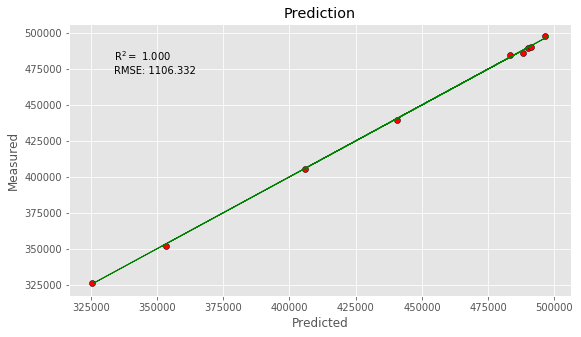

In [0]:
prediction(xtrain,xtest,ytrain,ytest, plot_components=False)

### Another Method

In [0]:
 pca = PCA()
X_reduced = pca.fit_transform(scale(X))  

[94676.13246046 21512.93077069 23359.27937362 15959.31118636
 11475.60895156  8948.42746083 14741.61126714 33718.19453796
  8632.74800002  8558.61757175  7870.54436875  8459.63331277
 16907.56726342  8398.30121164  1861.99168182]


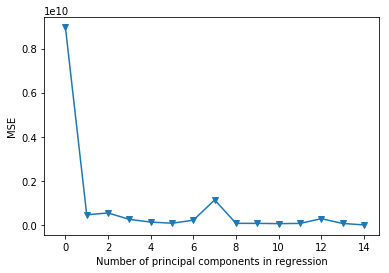

In [0]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 15 principle components, adding one component at the time.
for i in np.arange(1, 15):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
print(np.sqrt(mse))
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin=-1);

In [0]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 74.32,  94.09,  96.6 ,  98.43,  99.42,  99.81,  99.96,  99.99,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  ])

#### Performing PCA on training dataset and prediction on test

[111160.92231943]
[111160.92231943  26772.15814917  27215.9643405   11278.87029246
  19662.1114156   19349.22715773  24274.7175641   64811.16423739
  20461.13301118  15220.51875902  12105.00318203  11257.46601413
  15594.29587053 130387.07945848 125263.90658524]


(-1, 14.7)

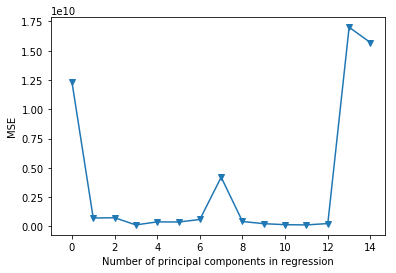

In [0]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
print(np.sqrt(mse))
# Calculate MSE using CV for the 14 principle components, adding one component at the time.
for i in np.arange(1, 15):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
print(np.sqrt(mse))
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')

plt.xlim(xmin=-1)

In [0]:
i=6
X_reduced_test = pca2.transform(scale(X_test))[:,:i]
# Train regression model on training data
regr = LinearRegression()
regr.fit(X_reduced_train[:,:i], y_train)
# Prediction with test data
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

63469.32859335561